<a href="https://colab.research.google.com/github/JeanRintoul/Covid-19/blob/master/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Covid-19 is showing how ill-prepared we are to be a connected world. Following the [Kaiser Nurse in California who couldn't get testing despite being symptomatic](https://thehill.com/policy/healthcare/486235-quarantined-nurse-in-california-warns-not-enough-is-being-done-to-combat?fbclid=IwAR3K17BUFBHYIOgvxqYJ_2HaCm3xKsqwls6jHLAn1hDBWkY0K684HoM0yNM) who suggested testing is not available, I realised that testing is woefully broken in the US. In the UK testing has been more extensive due to the NHS, and their daily case rate seems to be increasing more slowly than the US. I assumed that anyone could be tested in the UK, though today(mon 9th March) I talked to a Nurse at my local GP. She told me how some sick patients from Northern Italy came in and spoke with a GP who later tested positive for Coronavirus. The GP was not eligible for testing for Coronavirus because they had no symptoms, and they have continued to see hundreds of patients since. This is a clear risk factor, and suggest not enough is being done to contain the virus. 

We have failed to contains the virus, but we are also failing to act decisively to curb the outbreak. This is due to the equal in magnitude problem of how to shut down the worlds economy? What happens to the have nots, will they riot? How can we afford to effectively isolate? Many are incentivized to put others at risk due to economic necessity. 



# Time Series Comparisons. 

Data is taken from John Hopkins data set which is updated nightly on github. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in long_scalars


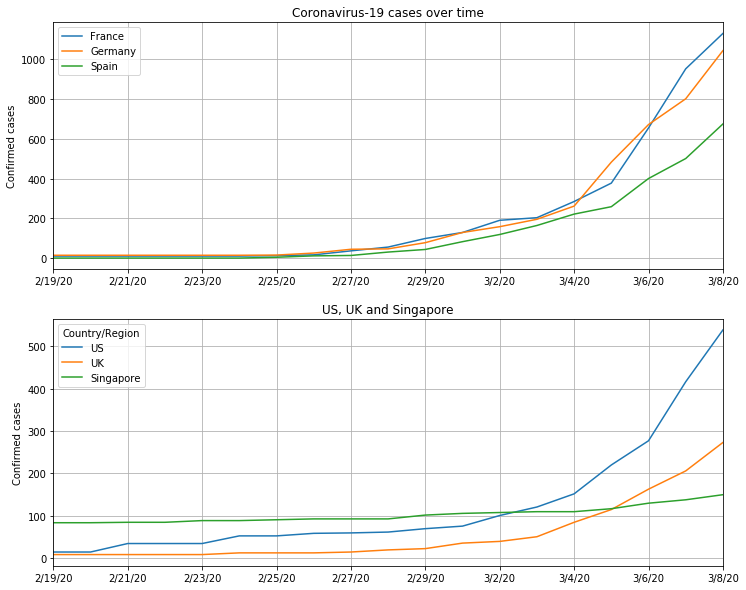

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

confirmed_csv = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
dead_csv      = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
recovered_csv = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"
confirmed = pd.read_csv(confirmed_csv).drop(['Lat','Long','Province/State'], axis=1).groupby('Country/Region').sum().T 
dead      = pd.read_csv(dead_csv).drop(['Lat','Long','Province/State'], axis=1).groupby('Country/Region').sum().T 
recovered = pd.read_csv(recovered_csv).drop(['Lat','Long','Province/State'], axis=1).groupby('Country/Region').sum().T 
# toggle these thresholds to select countries to display in the time series. 
min_threshold_confirmed_cases = 200
max_threshold_confirmed_cases = 20000 # let's remove china for now. 
min2_threshold_confirmed_cases = 100
max2_threshold_confirmed_cases = 100000 # let's remove china for now. 
columns = list(confirmed)
selected  = []
deaths    = []
mortality_rate = []
all_mortality_rate = []
counts = []
for i in columns: 
    if min_threshold_confirmed_cases < confirmed[i][-1] < max_threshold_confirmed_cases and i != 'Others': 
      selected.append(i)
      deaths.append(dead[i][-1])
      mortality_rate.append(100*(dead[i][-1])/confirmed[i][-1])

    if min2_threshold_confirmed_cases < confirmed[i][-1] < max2_threshold_confirmed_cases and i != 'Others':       
      counts.append(i)
      all_mortality_rate.append(100*(dead[i][-1])/(recovered[i][-1] + (dead[i][-1])  ))
#print(len(confirmed))

subset = confirmed.loc[:,selected]
USvsUK = confirmed.loc[:,['US','UK','Singapore']]
#top6 = confirmed.loc[:,['South Korea','Italy','Iran','France','Germany','Spain']]

top6 = confirmed.loc[:,['France','Germany','Spain']]


fig, (ax1, ax2) = plt.subplots(2,figsize=(12, 10))
top6[28:].plot(ax=ax1, grid='on')
ax1.legend(loc='upper left')
ax1.set_title('Coronavirus-19 cases over time')
ax1.set_ylabel('Confirmed cases')
# second plot is US and UK curves
USvsUK[28:].plot(ax=ax2, grid='on')
ax2.set_ylabel('Confirmed cases')
ax2.set_title('US, UK and Singapore');


# fig, (ax1, ax2) = plt.subplots(2,figsize=(15, 10))
# subset[28:].plot(ax=ax1, grid='on')
# ax1.legend(loc='upper left')
# ax1.set_title('Coronavirus-19 cases over time')
# ax1.set_ylabel('Confirmed cases')
# # second plot is US and UK curves
# USvsUK[28:].plot(ax=ax2, grid='on')
# ax2.set_ylabel('Confirmed cases')
# ax2.set_title('US, UK and Singapore');


# Prediction of growth rates per country

The countries closest to China appear to have the most linear trends. Those in other parts of the world are rising exponentially. Why?

Now plot the daily rise for a given country as a bar chart. 

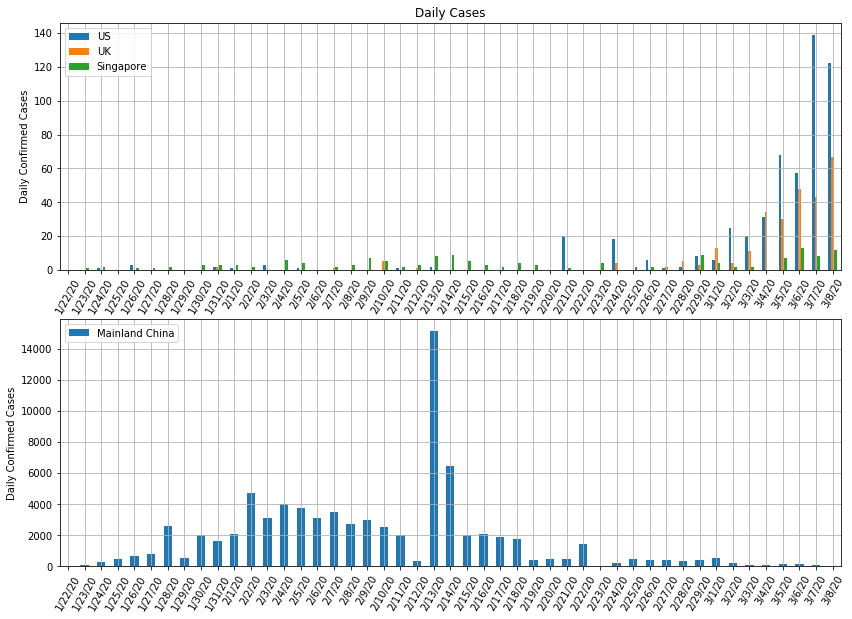

In [87]:
# compare country rates per day.
country  = 'US'
country2 = 'UK'
country3 = 'Mainland China'
country4 = 'Singapore'
country5 = 'Italy'
country6 = 'Australia'
daily = confirmed.diff(periods=1,axis=0).copy()

c1 = daily[country]
c2 = daily[country2]
c3 = daily[country3]
c4 = daily[country4]
c5 = daily[country5]
c6 = daily[country6]
df = pd.DataFrame({country:c1,country2:c2,country4:c4})

dt = pd.DataFrame({country3:c3})
#fig, (ax1) = plt.subplots(1,figsize=(14, 5))
fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
df.plot.bar(ax=ax1,rot=60,grid='on')
ax1.set_ylabel('Daily Confirmed Cases')
ax1.set_title('Daily Cases')
ax1.legend(loc='upper left')
dt.plot.bar(ax=ax2,rot=60,grid='on')
ax2.set_ylabel('Daily Confirmed Cases')
#ax2.set_title('Mainland China');
ax2.legend(loc='upper left');

# Growth rate and doubling time. 

Looking at the percentage rate of growth over time, estimated based on the last 5 days. The plots accuracy is absolutely limited by the number of confirmed cases reported, but you can fairly clearly see that community transmission is occuring once the growth rate gets off the ground.

Growth Rate = 100*((Present-Past)/Past

Questions: Why would Italy's growth rate be declining? I expect this is a reporting error in that they cannot do more tests than they are already doing. 

Second plot is the estimated doubling time for a range of countries. 



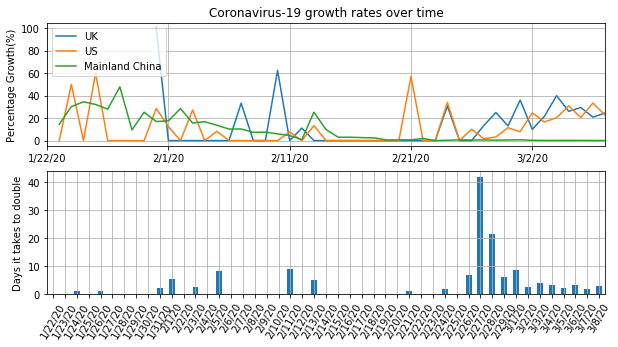

In [148]:
multidaydiffs = confirmed.diff(periods=1,axis=0).copy() # change period to select how many days growth rate is calculate over. 
growth        = 100*multidaydiffs/confirmed
doubling_time = 70/growth

dt_median_per_country = doubling_time.apply(lambda s: s[np.isfinite(s)].dropna()).median()

#fig, (ax1) = plt.subplots(1,figsize=(10, 5))
fig, (ax1, ax2) = plt.subplots(2,figsize=(10, 5));
growth['UK'].plot(ax=ax1, grid='on')
growth['US'].plot(ax=ax1, grid='on')
#growth['Australia'].plot(ax=ax1, grid='on')
#growth['Italy'].plot(ax=ax1, grid='on')
growth['Mainland China'].plot(ax=ax1, grid='on')
ax1.legend(loc='upper left')
ax1.set_title('Coronavirus-19 growth rates over time')
ax1.set_ylabel('Percentage Growth(%)');

doubling_time['US'].plot.bar(ax=ax2,rot=60,grid='on')
ax2.set_ylabel('Days it takes to double')

#print(doubling_time[:][-1])

###
d2_per_country = []
counts  =[]
for i in columns: 
    if min_threshold_confirmed_cases < confirmed[i][-1] < max_threshold_confirmed_cases and i != 'Others': 
      d2_per_country.append(dt_median_per_country[i])
      counts.append(i)

#print(d2_per_country,counts)
# fig, (ax1) = plt.subplots(1,figsize=(10, 5))
# ax1.grid(zorder=0)
# ax1.bar(counts,d2_per_country, width=0.5, color='b', align='center',zorder = 3)
# ax1.set_ylabel('Doubling Rate(days)')
# ax1.set_title('Doubling rate per country')
# ax1.set_xticklabels(counts,rotation=60);

# Hypothesis, countries above a certain number of cases are all lying.

How to prove?
The number of cases per day decreases...

# Identifying the mortality rate


How should we estimate the mortality rate? 
The proportion of closed cases was my initial guess, although the WHO thinks otherwise and gets a 3.4% mortality rate. It's difficult to estimate as many people never become confirmed cases as they are never tested. 



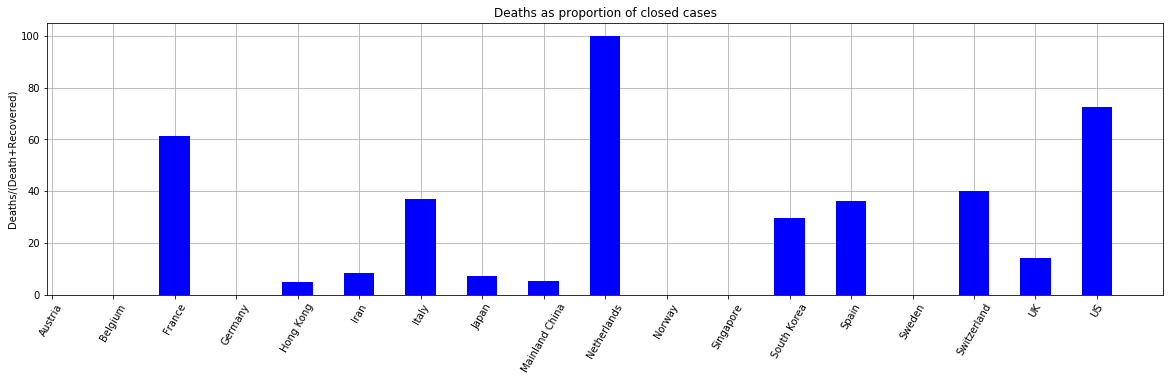

In [54]:
fig, (ax1) = plt.subplots(1,figsize=(20, 5))
ax1.grid(zorder=0)
ax1.bar(counts,all_mortality_rate, width=0.5, color='b', align='center',zorder = 3)
#threshold = 3.4 # this is the WHO mortality estimation on March 3. 
#ax1.plot([0., 18.0], [threshold, threshold], "k--")
ax1.set_ylabel('Deaths/(Death+Recovered)')
ax1.set_title('Deaths as proportion of closed cases')
ax1.set_xticklabels(counts,rotation=60);

# China vs the rest of the world.


China cases vs the rest of the world. 
Confirmed cases in two bins, one China, one rest of world. 



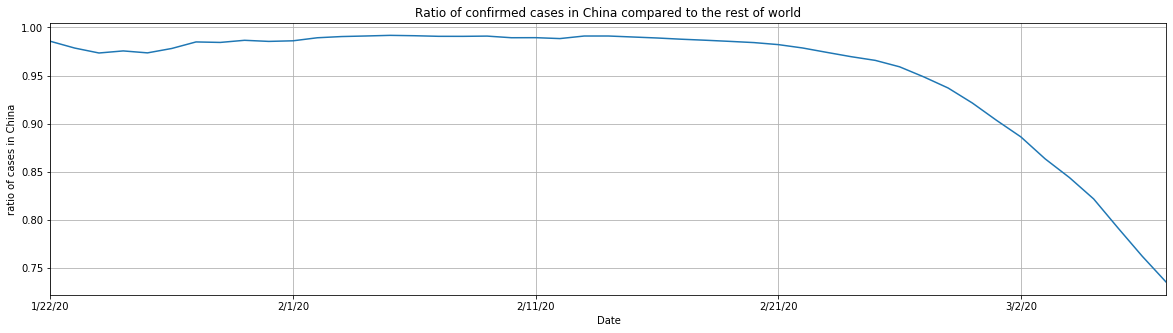

In [55]:
df = confirmed.copy()
df['everywhere_else'] = df.drop(['Mainland China'],axis=1).sum(axis=1)
df['china']           = confirmed['Mainland China']
df['ratios']          = df['china']/(df['everywhere_else']+df['china'])
# print (df['ratios'])
fig, (ax1) = plt.subplots(1,figsize=(20, 5))
df['ratios'].plot(ax=ax1, grid='on')
ax1.set_title('Ratio of confirmed cases in China compared to the rest of world')
ax1.set_ylabel('ratio of cases in China')
ax1.set_xlabel('Date');
